In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import layers, models
from collections import Counter

In [2]:
# Define dataset path
dataset_path = "../../datasets/wheat_dataset/128_wheat_dataset"

# Define parameters
batch_size = 8
img_size = (128, 170)

# Load train dataset (60%), validation dataset (20%), and test dataset (20%)
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    image_size=img_size,
    batch_size=batch_size,
    color_mode="rgb",
    validation_split=0.4,  # 40% for validation + test
    subset="training",
    seed=42
)

val_test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    image_size=img_size,
    batch_size=batch_size,
    color_mode="rgb",
    validation_split=0.4,
    subset="validation",
    seed=42
)

val_dataset = val_test_dataset.take(len(val_test_dataset) // 2)
test_dataset = val_test_dataset.skip(len(val_test_dataset) // 2)

class_names = train_dataset.class_names
print(f"Class Labels: {class_names}")

# Optimize dataset performance
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

Found 19159 files belonging to 5 classes.
Using 11496 files for training.
Found 19159 files belonging to 5 classes.
Using 7663 files for validation.
Class Labels: ['brown_rust', 'healthy', 'mildew', 'septoria', 'yellow_rust']


C:\Users\MarcoAntónioNóbregaA\AppData\Local\Temp\ipykernel_21460\1044237260.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(train_class_counts.keys()), y=list(train_class_counts.values()), palette="Blues")
C:\Users\MarcoAntónioNóbregaA\AppData\Local\Temp\ipykernel_21460\1044237260.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(test_class_counts.keys()), y=list(test_class_counts.values()), palette="Greens")
C:\Users\MarcoAntónioNóbregaA\AppData\Local\Temp\ipykernel_21460\1044237260.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect

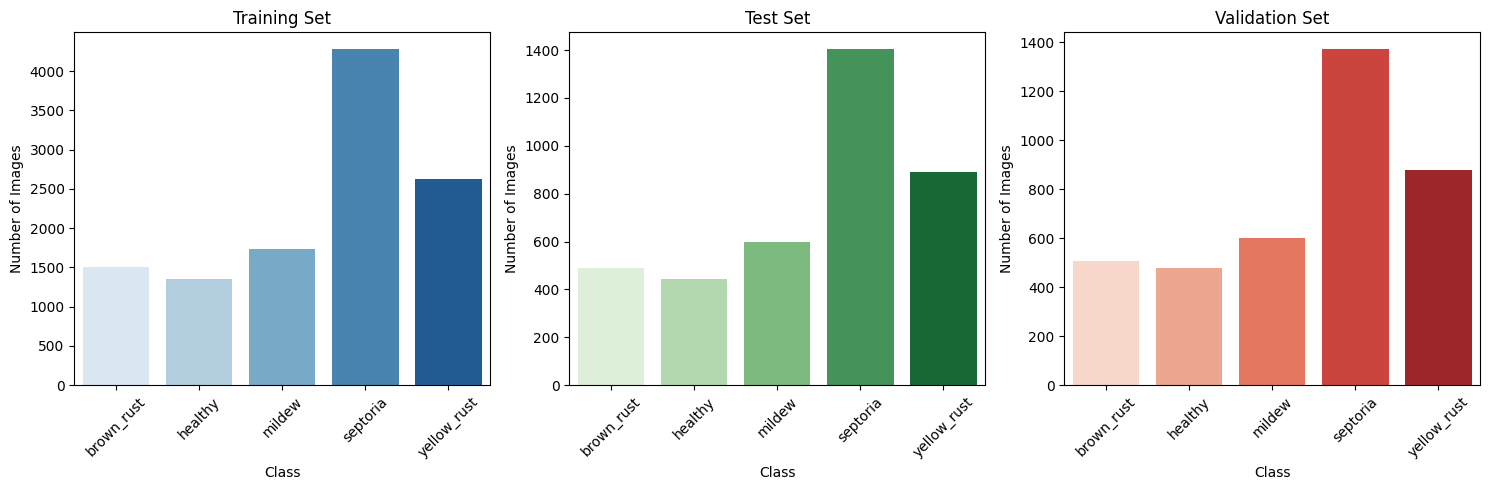

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Compute class distributions
train_counts = Counter()
test_counts = Counter()
val_counts = Counter()

for images, labels in list(train_dataset.as_numpy_iterator()):
    train_counts.update(labels)

for images, labels in list(test_dataset.as_numpy_iterator()):
    test_counts.update(labels)

for images, labels in list(val_dataset.as_numpy_iterator()):
    val_counts.update(labels)

# Convert counts to dictionary format
train_class_counts = {class_names[i]: train_counts[i] for i in range(len(class_names))}
test_class_counts = {class_names[i]: test_counts[i] for i in range(len(class_names))}
val_class_counts = {class_names[i]: val_counts[i] for i in range(len(class_names))}

# Plot all three distributions in one figure
plt.figure(figsize=(15, 5))

# Training Set
plt.subplot(1, 3, 1)
sns.barplot(x=list(train_class_counts.keys()), y=list(train_class_counts.values()), palette="Blues")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Training Set")
plt.xticks(rotation=45)

# Test Set
plt.subplot(1, 3, 2)
sns.barplot(x=list(test_class_counts.keys()), y=list(test_class_counts.values()), palette="Greens")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Test Set")
plt.xticks(rotation=45)

# Validation Set
plt.subplot(1, 3, 3)
sns.barplot(x=list(val_class_counts.keys()), y=list(val_class_counts.values()), palette="Reds")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Validation Set")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [4]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(128, 170, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),

    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),

    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),

    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),

    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),

    layers.Flatten(),

    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(5, activation='softmax')

])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Show model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 170, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 128, 170, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 170, 64)      36928     
                                                                 
 batch_normalization_1 (Batc  (None, 128, 170, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 85, 64)       0         
 )                                                               
                                                        

In [5]:
epochs = 75  # As per paper
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs,
    batch_size=batch_size  # Small batch size to avoid memory issues
)


Epoch 1/75
1437/1437 [==============================] - 104s 69ms/step - loss: 1.2208 - accuracy: 0.5612 - val_loss: 0.8057 - val_accuracy: 0.7103
Epoch 2/75
1437/1437 [==============================] - 98s 68ms/step - loss: 0.9163 - accuracy: 0.6679 - val_loss: 0.7914 - val_accuracy: 0.7176
Epoch 3/75
1437/1437 [==============================] - 100s 70ms/step - loss: 0.8368 - accuracy: 0.6989 - val_loss: 1.0580 - val_accuracy: 0.6660
Epoch 4/75
1437/1437 [==============================] - 101s 70ms/step - loss: 0.7554 - accuracy: 0.7257 - val_loss: 0.5734 - val_accuracy: 0.8160
Epoch 5/75
1437/1437 [==============================] - 101s 70ms/step - loss: 0.6510 - accuracy: 0.7696 - val_loss: 0.6028 - val_accuracy: 0.7863
Epoch 6/75
1437/1437 [==============================] - 101s 70ms/step - loss: 0.5738 - accuracy: 0.8014 - val_loss: 0.6650 - val_accuracy: 0.7691
Epoch 7/75
1437/1437 [==============================] - 101s 70ms/step - loss: 0.5145 - accuracy: 0.8203 - val_loss: 0.

479/479 [==============================] - 11s 21ms/step - loss: 0.1694 - accuracy: 0.9494
Test Accuracy: 0.9494


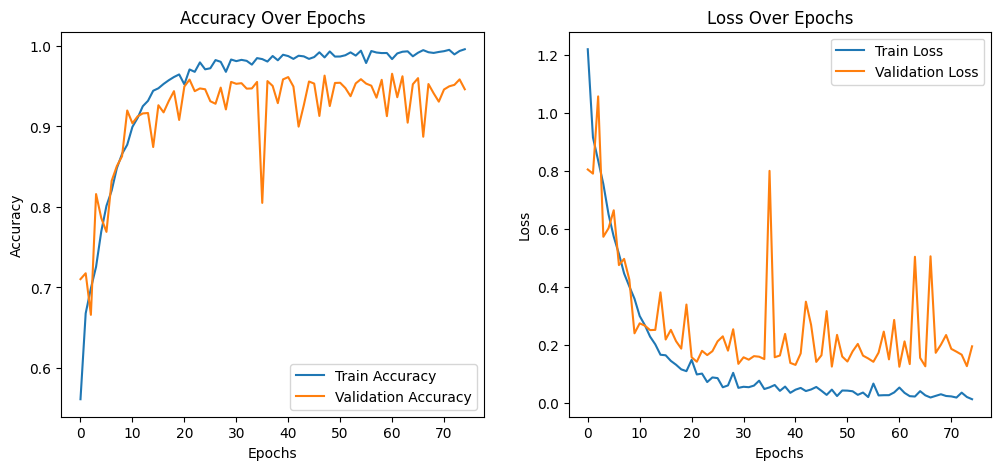

In [6]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot training history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label="Train Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label="Train Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Over Epochs")
plt.legend()

plt.show()

1/1 [==============================] - 0s 20ms/step
Classification Report:
               precision    recall  f1-score   support

  brown_rust       0.90      0.97      0.93       496
     healthy       0.93      0.93      0.93       442
      mildew       0.96      0.94      0.95       600
    septoria       0.96      0.98      0.97      1402
 yellow_rust       0.97      0.91      0.94       891

    accuracy                           0.95      3831
   macro avg       0.94      0.95      0.94      3831
weighted avg       0.95      0.95      0.95      3831



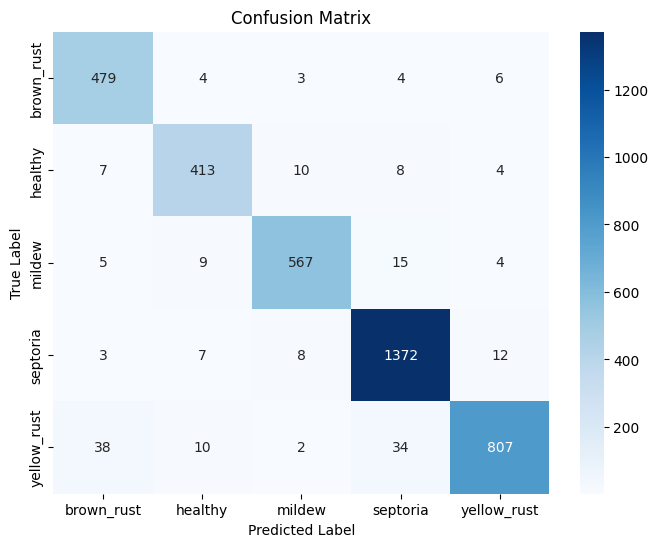

In [7]:
# Get predictions and true labels
y_true = []
y_pred = []

for images, labels in test_dataset:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

# Classification Report
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()